In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

In [2]:
%run Active_Inference.ipynb import MDP

In [3]:
MDP = MDP.explore_exploit_model()

In [4]:
MDP.message_passing_and_policy_selection()

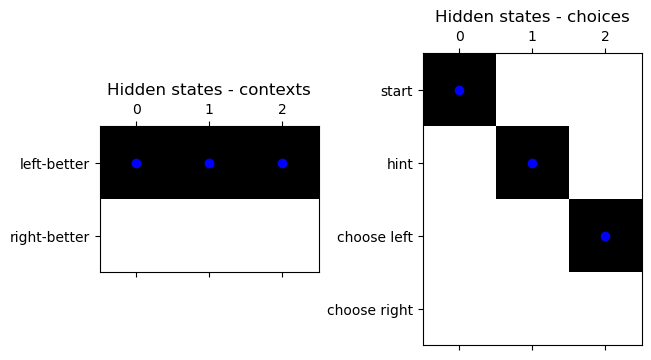

In [107]:
# Posterior beliefs about hidden states
df_X0 = pd.DataFrame(MDP.X[0], index=['left-better', 'right-better'])
df_X1 = pd.DataFrame(MDP.X[1], index=['start', 'hint', 'choose left', 'choose right'])

fig, axs = plt.subplots(1,2, constrained_layout=True)

axs[0].matshow(df_X0, cmap=cm.binary)
axs[0].plot(MDP.s[0]-1, 'bo')
axs[0].set_title('Hidden states - contexts')

axs[1].matshow(df_X1, cmap=cm.binary)
axs[1].plot(MDP.s[1]-1, 'bo')
axs[1].set_title('Hidden states - choices')

plt.sca(axs[0])
plt.yticks(range(0, len(df_X0.index.values)), df_X0.index)
plt.sca(axs[1])
plt.yticks(range(0, len(df_X1.index.values)), df_X1.index)

plt.show()

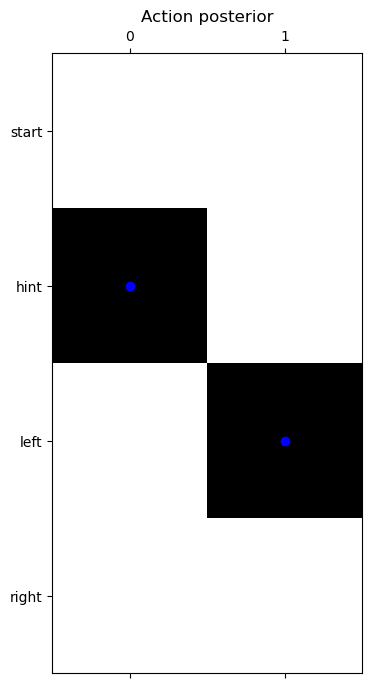

In [110]:
# Action posterior
df_P = pd.DataFrame(MDP.P.squeeze().T, index=['start', 'hint', 'left', 'right'])
plt.matshow(df_P, cmap=cm.binary)
plt.yticks(range(0, len(df_P.index.values)), df_P.index)
plt.plot(0, (MDP.u-1)[1][0], 'bo')
plt.plot(1, (MDP.u-1)[1][1],'bo')
plt.title('Action posterior')
plt.show()

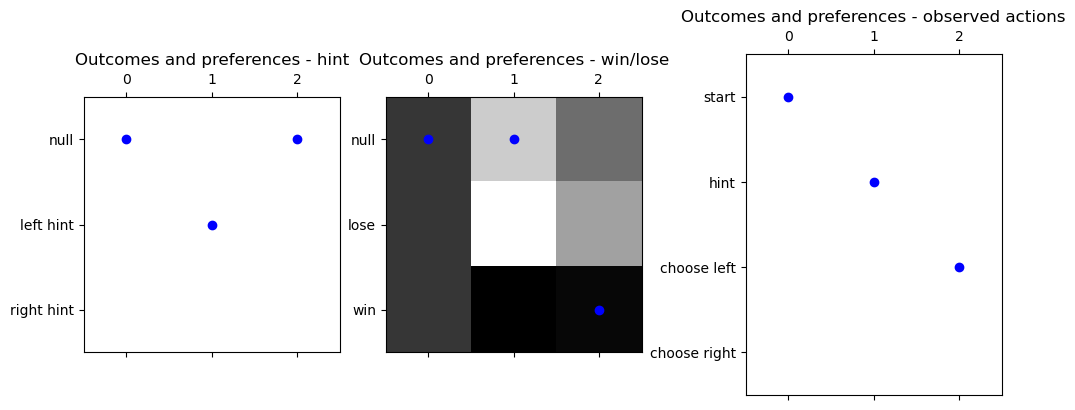

In [138]:
# Preferences and outcomes
df_C0 = pd.DataFrame(MDP.C[0], index=['null', 'left hint', 'right hint'])
df_C1 = pd.DataFrame(MDP.C[1], index=['null', 'lose', 'win'])
df_C2 = pd.DataFrame(MDP.C[2], index=['start', 'hint', 'choose left', 'choose right'])

fig, axs = plt.subplots(1,3, constrained_layout=True, figsize=(10,5))

axs[0].matshow(df_C0, cmap='gist_yarg')
axs[0].plot(MDP.o[0]-1, 'bo')
axs[0].set_title('Outcomes and preferences - hint')

axs[1].matshow(df_C1, cmap='gist_yarg')
axs[1].plot(MDP.o[1]-1, 'bo')
axs[1].set_title('Outcomes and preferences - win/lose')

axs[2].matshow(df_C2, cmap='gist_yarg')
axs[2].plot(MDP.o[2]-1, 'bo')
axs[2].set_title('Outcomes and preferences - observed actions')

plt.sca(axs[0])
plt.yticks(range(0, len(df_C0.index.values)), df_C0.index)
plt.sca(axs[1])
plt.yticks(range(0, len(df_C1.index.values)), df_C1.index)
plt.sca(axs[2])
plt.yticks(range(0, len(df_C2.index.values)), df_C2.index)

plt.show()